In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
df = pd.read_csv("C:\\Users\\PUNEET SINGH\\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [5]:
# Summary of the whole data
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
# Dropping the User ID column as it is not important .
df.drop(['User ID'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
# checking the value count of gender and purchased category
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [9]:
df['Purchased'].value_counts()     
# In Target varibale 0:NO,1:YES

0    257
1    143
Name: Purchased, dtype: int64

In [10]:
# CHECKING FOR THE NULL VALUES
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

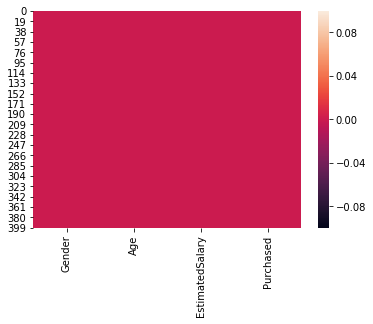

In [11]:
# PLOTTING THE HEAT MAP 
sns.heatmap(df.isnull())

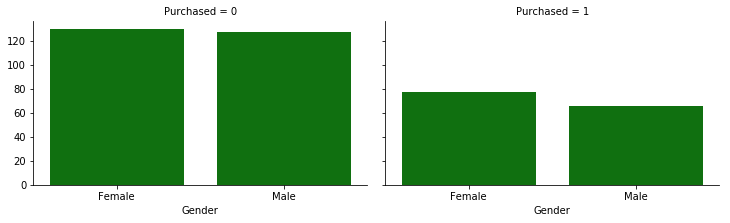

In [12]:
# BIVARIATE ANALYSIS#
grid = sns.FacetGrid(df,col='Purchased', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender',color='green')

In [13]:
# From THE GRAPH IT IS CLEAR THAT FEMALE HAS PURCHASED MORE THAN MALE

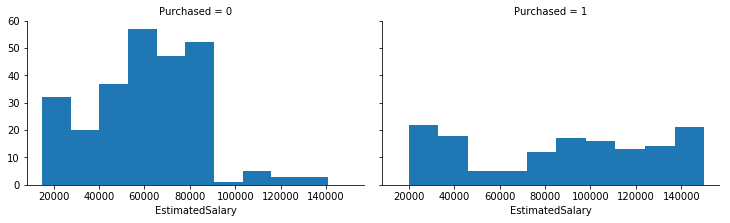

In [14]:
grid = sns.FacetGrid(df,col='Purchased',size=3.2, aspect=1.6)
grid.map(plt.hist,'EstimatedSalary')

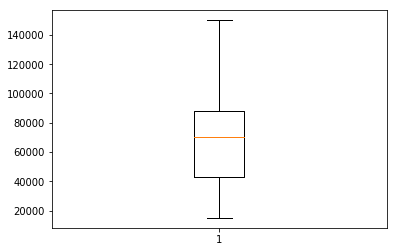

In [15]:
# CHECKING FOR OUTLIERS
plt.boxplot(df['EstimatedSalary'])
plt.show()

In [16]:
# CONVERTING THE GENDER CATEGORICAL FEATURE IN BINARY 
# IMPORTING THE LABEL ENCODER , ONE HOT ENCODER
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [17]:
Lb = LabelEncoder()                           
# created an instance of LabelEncoder

In [18]:
df_new = df

In [19]:
df_new.Gender=Lb.fit_transform(df_new.Gender)
df_new

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


In [20]:
# DIVIDING THE DATASET INTO INDEPENDENT AND DEPENDENT VARIABLES
x = df_new.values[:,0:3]
y = df_new.values[:,3]

In [21]:
# FEATURE SCALING THROUGH STANDARD SCALER
# IMPORTING THE LIBRARY
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [23]:
x= pd.DataFrame(x)
x.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [24]:
# NOW TO HAVE TO APPLY THE PRINCIPAL COMPONENT ANALYSIS
# IMPORTING THE LIBRARY
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [25]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
x = pca.transform(x)

In [27]:
type(x)

numpy.ndarray

In [28]:
# CONVERTING THE X INTO DATAFRAME
x = pd.DataFrame(x)

In [29]:
x.head()

,0,1
0,-2.529709,-0.056084
1,-1.522671,0.334502
2,-0.795342,-1.439684
3,-0.474232,-1.269265
4,-1.473875,0.541042


In [30]:
# SPLITTING THE DATASET
# IMPORTING THE LIBRARY
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [31]:
# IMPORTING THE MODEL LIBRAIRES
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [32]:
regression = LogisticRegression()
KN = KNeighborsClassifier( n_neighbors=10)
tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
rf = RandomForestClassifier( n_estimators=50,criterion='entropy')

In [33]:
score = cross_val_score(LogisticRegression(),x,y,cv=7,scoring='accuracy').mean()*100
score
# PERCENTAGE OUR  MODEL HAS BEEN TRAINED 

82.17495709717645

In [34]:
pred = cross_val_predict(LogisticRegression(),x,y)
pred.shape

(400,)

In [35]:
# CHECKING THE ACCURACY OF THE MODEL PREDICTED 
# IMPORTING THE LIBRARY
from sklearn.metrics import accuracy_score,confusion_matrix

In [36]:
acc_score = accuracy_score(y,pred)*100
acc_score

80.25

In [37]:
# MODEL TRAINED WITH 82 % AND PREDICTED 80% CORRECT VALUES

In [38]:
kn_score = cross_val_score(KN,x,y,cv=7,scoring='accuracy').mean()*100
kn_score
# model got trained with this percentage

82.9314665975283

In [39]:
kn_pred = cross_val_predict(KN,x,y,cv=5)
kn_pred.shape

(400,)

In [40]:
kn_acc_score = accuracy_score(y,kn_pred)*100
kn_acc_score
# model predicted this percentage accuracy

82.5

In [41]:
decision_score = cross_val_score(tree,x,y,cv=5,scoring='accuracy').mean()*100
decision_score

79.68475543053603

In [42]:
# decision tree model got trained with 79% 


In [43]:
decision_pred = cross_val_predict(tree,x,y,cv=5)
decision_pred.shape

(400,)

In [44]:
decision_pred_score = accuracy_score(decision_pred,y)*100
decision_pred_score

79.75

In [45]:
###### RANDOM FOREST#########
rf_score = cross_val_score(rf,x,y,scoring='accuracy',cv=5).mean()*100
rf_score

83.72589467104234

In [46]:
re_pred= cross_val_predict(rf,x,y,cv=5)
re_pred.shape

(400,)

In [47]:
re_accuracy = accuracy_score(y,re_pred)*100
re_accuracy

82.5

In [48]:
############# FROM ABOVE ALL THE MODELS RANDOM FOREST HAS ESTIMAED THE BEST PREDICTIONS ###############


In [49]:
############ SAVING THE RANDOM FOREST MODEL################
# IMPORTING THE PICKEL LIBRARY
import pickle
filehandler = open("finalmodel.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(rf,filehandler)
filehandler.close()